Upper level:
$$
\min_{x,y} f(x,y)=xy+2x^2
$$
Lower level:
\begin{align}
\min_y g(x,y)=y^2\\
\text{s.t.~} y\leq \sin(x)
\end{align}

**Exact Solution**:
$$
f(x,y)|_{y=y^*(x)}=\begin{cases}
2x^2,\quad \sin(x)\geq 0 \\
x\sin(x)+2x^2, \quad \sin(x)<0
\end{cases}
$$

Penalty based method:
Fix $\gamma,x$.
Eq. (12):
$$
\max_{\mu}\min_y y^2+\mu(y-\sin(x))
$$
gives
\begin{align}
\mu^*_g(x)= & [-2\sin(x)]_+ \\
y^*_g(x)= & -\frac{\mu^*_g(x)}{2}
\end{align}

Eq. (13):
$$
\max_{\mu}\min_y  xy+2x^2+\gamma(y^2-y_g^*(x)) +\mu(y-\sin(x))
$$
gives
\begin{align}
\mu^*_F(x)= & [-x-2\gamma\sin(x)]_+ \\
y^*_F(x)= & -\frac{\mu^*_F(x)+x}{2\gamma}
\end{align}

F(x) is therefore obtained:
$$
F(x)=xy^*_F(x)+x^2+\gamma(y_F^*(x)^2-y_g^*(x)^2)+\mu_F^*(x)(y_F^*(x)-\sin(x))
$$


In [1]:
import numpy as np
def F(x):
    # f(x,y)|_{y=y^*(x)}
    if np.sin(x)>=0:
        return 2*x**2
    else:
        return x*np.sin(x)+2*x**2

def F_gamma (x,gamma):
    # F(x)
    lambda_g= np.max((0,-2*np.sin(x)))
    y_g = - lambda_g/2
    lambda_F = np.max((-x-2*gamma*np.sin(x),0))
    y_F = -(x+lambda_F)/(2*gamma)
    return x*y_F + x**2 + gamma*(y_F**2-y_g**2) + lambda_F*(y_F-np.sin(x))

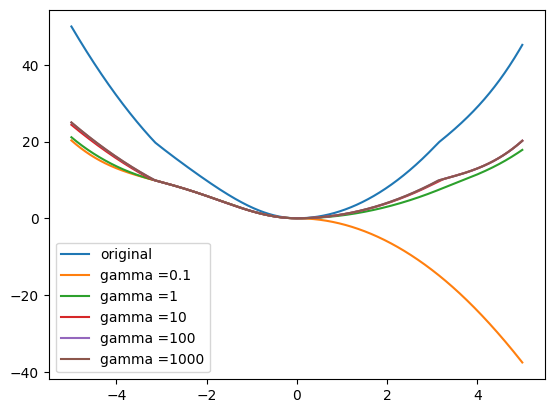

In [2]:
import matplotlib.pyplot as plt
x=np.linspace(-5,5,10001)
y = [F(i) for i in x]
plt.plot(x,y, label = 'original' )
for gamma in [1e-1,1, 10, 100, 1000]:
    F_gamma_ = [F_gamma(i,gamma) for i in x]
    plt.plot(x,F_gamma_,label='gamma ={}'.format(gamma))
plt.legend()
plt.show()

\begin{align}
    \min_{x,y} \; & \; \frac{e^{-y+2}}{2+\cos (4x)} + \frac{1}{2} \ln ((4x-2)^2 + 1) + x^2 \label{eq:toy_example1} \\
    \text{s.t.} \; & \; x \in [0,3], \quad y \in \text{arg}\min_y \; (y - 2x)^2 \nonumber \\
    & \qquad\qquad\qquad\qquad\quad\;\; \text{s.t.:} \; y \leq x \nonumber
\end{align}

**Exact Solution**:
$$
f(x,y)|_{y=x}= \frac{e^{-x+2}}{2+\cos (4x)} + \frac{1}{2} \ln ((4x-2)^2 + 1) + x^2 
$$

Penalty based method:
Fix $\gamma,x$.
Eq. (12):
$$
\max_{\mu}\min_y (y-2x)^2+\mu(y-x)
$$
gives
\begin{align}
\mu^*_g(x)= & [2x]_+ = 2x\\
y^*_g(x)= & 2x -\frac{\mu^*_g(x)}{2} = x
\end{align}

Eq. (13):
$$
\max_{\mu}\min_y  \frac{e^{-y+2}}{2+\cos (4x)} + \frac{1}{2} \ln ((4x-2)^2 + 1) + x^2  + \gamma((y-2x)^2-(y_g^*(x)-2x)^2) +\mu(y-x)
$$
This is equivalent to 
$$
\max_{\mu}\min_y  \frac{e^{-y+2}}{2+\cos (4x)} + \gamma(y-2x)^2 +\mu(y-x)
$$
We do not have analytical solution here.
Moreover, if $\gamma$ is set as a large number, it may leads to overflow as it involves exponential term. So it is worthwile to tackle a more computationally-friendly objective

$$
\max_{\mu}\min_y  \frac{1}{\gamma}\frac{e^{-y+2}}{2+\cos (4x)} + (y-2x)^2 + \frac{1}{\gamma}\mu(y-x)
$$

In [3]:
import math
def g(x, y):
    return (y-2*x)**2

def dgx(x,y):
    return -4*(y-2*x)

def dgy(x,y):
    return 2*(y-2*x)

def dg(x,y):
    return np.array([dgx(x,y), dgy(x,y)])

def f(x,y):
    return math.exp(-y+2)/(2+math.cos(4*x))+0.5*math.log((4*x-2)**2+1) + x**2

def f_np(x,y):
    return np.exp(-y+2)/(2+np.cos(4*x))+0.5*np.log((4*x-2)**2+1) + x**2

def dfx(x,y):
    return 4*math.exp(-y+2)*math.sin(4*x)/((2+math.cos(4*x))**2)+(16*x-8)/((4*x-2)**2+1) + 2*x

def dfy(x,y):
    return -math.exp(-y+2)/(2+math.cos(4*x))

def df(x,y):
    return np.array([dfx(x,y), dfy(x,y)])

In [4]:
# def maxminoptimizer_eq12(x, y0, lambda0, tau, beta, epsilon=1e-6):
#     t = 0
#     pg = 1000
#     lambda_ = 0.1#lambda0
#     y_ = y0
#     while np.linalg.norm(pg) > epsilon:
#         lamb = lambda_
#         y = y_
        
#         y_ = y - tau*(dgy(x,y) + lamb)
#         lambda_ = lamb + beta*(y - x)
#         lambda_ = max(lambda_, 0) # Lambda must always be positive

#         pg = 1/beta*((lamb - lambda_) + (y-y_))
#         t += 1
#     return y, lamb

# def maxminoptimizer_eq13(x, y0, lambda0, lambda_opt, gam, tau, beta, epsilon=1e-6):
#     t = 0
#     pg = 1000
#     lambda_ = lambda0
#     y_ = y0
#     while np.linalg.norm(pg) > epsilon:
#         lamb = lambda_
#         y = y_

#         lambda_ = lamb + beta*(y - x)
#         y_ = y - tau*(dfy(x,y) + gam*(dgy(x, y) - lambda_opt) + lamb)
#         y_ = max(y_,-10)
#         y_ = min(y_,10)
#         lambda_ = max(lambda_, 0) # Lambda must always be positive

#         pg = 1/beta*((lamb - lambda_) + (y-y_))
#         t += 1
#     return y, lamb

def maxminoptimizer_eq12(x, y0, lambda0, tau, beta, epsilon=0.01):
    t = 0
    pg = 1000
    lambda_ = 0.1#lambda0
    y_ = y0
    while np.linalg.norm(pg) > epsilon:
        lamb = lambda_
        y = y_

        lambda_ = lamb + beta*(y - x)
        y_ = y - tau*(dgy(x,y) + lamb)

        lambda_ = max(lambda_, 0) # Lambda must always be positive

        pg = 1/beta*((lamb - lambda_) + (y-y_))
        t += 1
    return y, lamb

def maxminoptimizer_eq13(x, y0, lambda0, lambda_opt, gam, tau, beta, epsilon=0.01):
    t = 0
    pg = 1000
    lambda_ = lambda0
    y_ = y0
    while np.linalg.norm(pg) > epsilon:
        lamb = lambda_
        y = y_

        lambda_ = lamb + beta*(y - x)
        y_ = y - tau*(dfy(x,y) + gam*(dgy(x, y)) + lamb)

        lambda_ = max(lambda_, 0) # Lambda must always be positive

        pg = 1/beta*((lamb - lambda_) + (y-y_))
        t += 1
    return y, lamb

In [5]:
def F(x):
    return math.exp(-x+2)/(2+math.cos(4*x)) + 0.5* math.log((4*x-2)**2 +1) + x**2

def F_gamma (x,gamma, epsilon = 1e-10):
    # F(x)
    lambda_g= np.max((0,2*(x)))
    y_g = x 
    y_g,lambda_g = maxminoptimizer_eq12(x, x, 0.1, tau=0.1, beta=0.1, epsilon = 1e-6) 
    y_F,lambda_F = maxminoptimizer_eq13(x, x, 0.1, lambda_g, gamma, tau=0.1, beta=0.1, epsilon = 1e-4) 
    return f(x,y_F)+gamma*(g(x, y_F)-g(x, y_g))+lambda_F*(y_F-x)

def d_F_gamma (x,gamma, epsilon = 1e-10):
    # F(x)
    lambda_g= np.max((0, 2*(x)))
    y_g = 2*x - lambda_g/2
    y_g,lambda_g = maxminoptimizer_eq12(x, x, 0.1, tau=0.1, beta=0.1, epsilon = 1e-6) 
    y_F,lambda_F = maxminoptimizer_eq13(x, x, 0.1, lambda_g, gamma, tau=0.1, beta=0.1, epsilon = 1e-4) 
    
    Fx = f(x,y_F)+gamma*(g(x, y_F)-g(x, y_g))+lambda_F*(y_F-x)
    dFx = dfx(x, y_F) + gamma*(dgx(x, y_F)-dgx(x, y_g)+lambda_g)  - lambda_F 
    return dFx
    
def solve_F(x_,gam,alpha=1e-1,tau = 1e-1,epsilon=1e-10):
    pg =10
    while np.linalg.norm(pg) > epsilon:
        x=x_
        dx = d_F_gamma (x,gamma, epsilon = 1e-10)
        x_ = x - alpha*dx
        x_ = max(x_,0)
        x_ = min(x_,3)
        pg = 1/alpha*(x-x_)
    return x,F_gamma(x,gam)

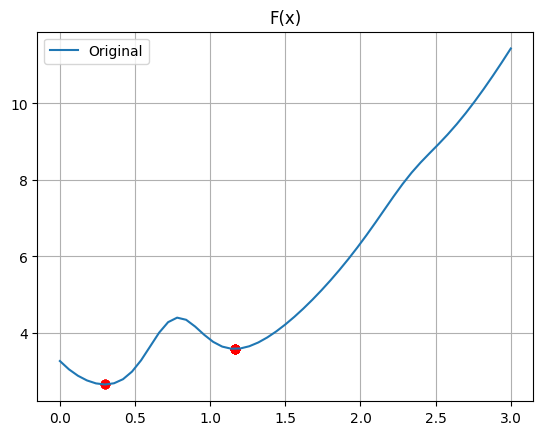

In [6]:
x=np.linspace(0,3,51)
y = [F(i) for i in x]
plt.plot(x,y, label = 'Original' )

for gamma in [1,2,3]:
    x_list =[]
    y_list = []
    for x in np.linspace(0,3,51):
        x_,y_=solve_F(x,gamma,alpha=1e-1,tau = 1e-1)
        x_list.append(x_)
        y_list.append(y_)

    plt.scatter(x_list,y_list,color='r',alpha = 0.1)
plt.legend()
plt.title("F(x)")
plt.grid()
plt.show()

In [7]:
def F_gamma (x,gamma, epsilon = 1e-10):
    # F(x)
    lambda_g= np.max((0, 2*(x)))
    y_g = 2*x - lambda_g/2
    # y_g,lambda_g = maxminoptimizer_eq12(x, x, 0.1, tau=0.1, beta=0.1, epsilon = 1e-6) 
    # print(lambda_g)
    y_F,lambda_F = maxminoptimizer_eq13(x, x, 0.1, lambda_g, gamma, tau=0.1, beta=0.1, epsilon = 1e-4) 
    return f(x,y_F)+gamma*(g(x, y_F)-g(x, y_g))+lambda_F*(y_F-x)


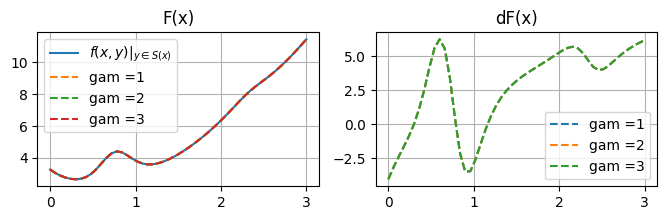

In [8]:
import matplotlib.pyplot as plt
x=np.linspace(0,3,51)
plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
plt.plot(x,y, label = r'$f(x,y)|_{y \in S(x)}$' )
for gamma in [1,2,3]:
    F_gamma_ = [F_gamma(i,gamma) for i in x]
    plt.plot(x,F_gamma_,'--',label='gam ={}'.format(gamma))
plt.legend()
plt.title("F(x)")
plt.grid()


plt.subplot(1,2,2)

#plt.plot(x[1:],dy, label = 'original' )
for gamma in [1,2,3]:
    F_gamma_ = [d_F_gamma(i,gamma) for i in x]
    plt.plot(x,F_gamma_,'--',label='gam ={}'.format(gamma))
plt.legend()
plt.title("dF(x)")
plt.grid()
plt.show()

In fact, we do not have the equivalence of penalty reformulation to the original problem as $

In fact, smaller $\gamma$ works well because the following has an equivalence to the original problem.
This means the penalty on 
\begin{align}
    \min_{x,y}  & \frac{e^{-y+2}}{2+\cos (4x)} + \frac{1}{2} \ln ((4x-2)^2 + 1) + x^2 \\
    \text{s.t.~} & x \in [0,3], y \leq x 
\end{align}